# Purpose
Here, we intend to verify that all of the probability density functions are correct and match the distributions produced by the samplers.

# Importing Modules

In [5]:
from copy import copy
import numpy as np

import matplotlib.pyplot as plt

import sys
sys.path.append('../')

import RMatrix
import Results
from Levels import Merger
import Resonances
from SpinGroups import SpinGroups

In [6]:
%matplotlib widget

# Level-Spacing Distributions

### Wigner Distribution

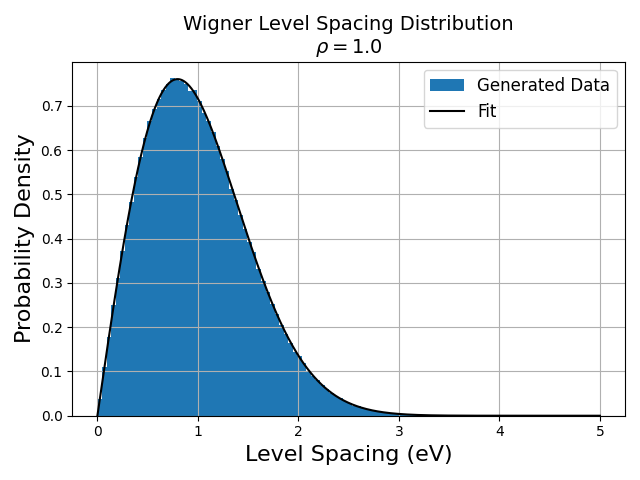

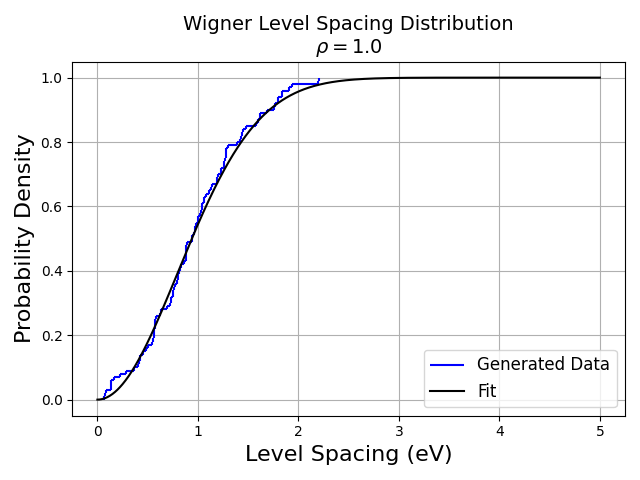

In [7]:
xMax = 5.0

A  = 181
EB = (1e-5,1e6)
Freq  = [1.0]
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
PDF = MP.fit('level spacing', 0)(X)
CDF = MP.fit('level spacing', 0, cdf=True)(X)

# PDF:
plt.figure(1)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, PDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Wigner Level Spacing Distribution\n'+rf'$\rho = {Freq[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# CDF:
level_spacings_less = level_spacings[:100]
plt.figure(2)
plt.clf()
Results.ecdf(level_spacings_less, color='b', label='Generated Data')
plt.plot(X, CDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Wigner Level Spacing Distribution\n'+rf'$\rho = {Freq[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Brody Distribution

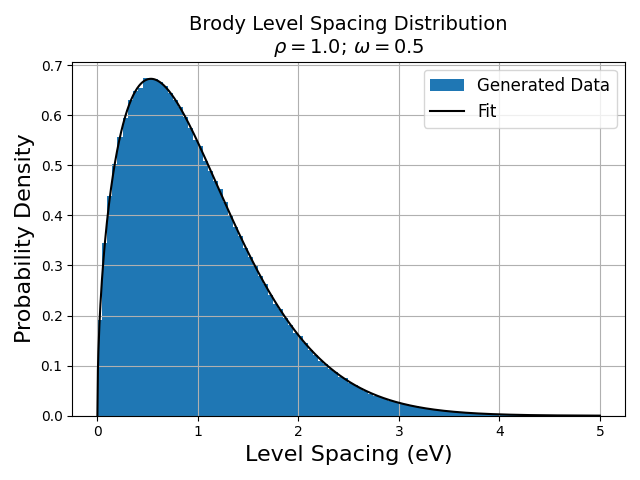

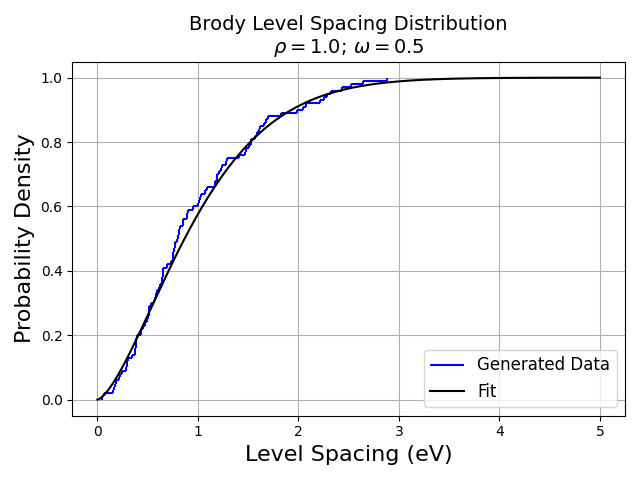

In [8]:
xMax = 5.0

A  = 181
EB = (1e-5,1e6)
Freq  = [1.0]
w     = [0.5] # Brody Parameter
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, w=w)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
PDF = MP.fit('level spacing', 0)(X)
CDF = MP.fit('level spacing', 0, cdf=True)(X)


plt.figure(3)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, PDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Brody Level Spacing Distribution\n'+rf'$\rho={Freq[0]}$; $\omega={w[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

level_spacings_less = level_spacings[:100]
plt.figure(4)
plt.clf()
Results.ecdf(level_spacings_less, color='b', label='Generated Data')
plt.plot(X, CDF, '-k', label='Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Brody Level Spacing Distribution\n'+rf'$\rho={Freq[0]}$; $\omega={w[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Merging Distribution

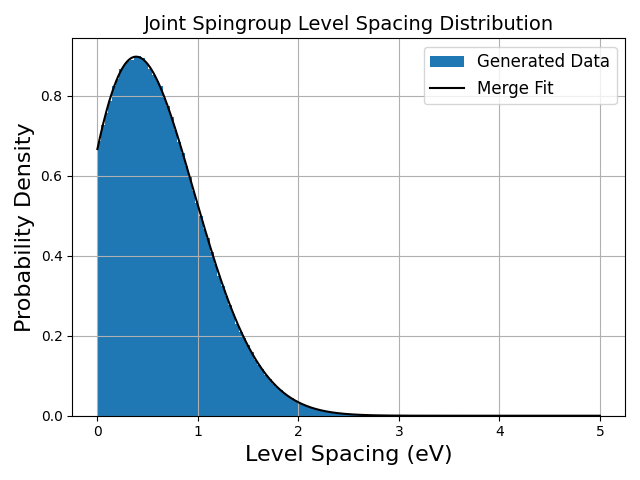

In [9]:
xMax = 5.0


A  = 181
EB = (1e-5,1e6)
Freq  = [1.0, 0.5]
Gnm   = [44.11355, 33.38697]
Ggm   = [55.00000, 55.00000]
dfn   = [1, 1]
dfg   = [250, 250]
l     = [0, 0]
j     = [3.0, 4.0]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

level_spacings = np.diff(Res.E)
level_spacings = np.sort(level_spacings)
level_spacings = level_spacings[level_spacings <= xMax]


L_fit = 1000
N_fit = len(Freq)
prior = np.ones((L_fit, N_fit))
X = np.linspace(0.0, xMax, L_fit)

level_spacing_dists = MP.distributions('Wigner')
merger = Merger(level_spacing_dists, err=1e-9)
P = merger.levelSpacingMerge(X, prior, prior)


plt.figure(5)
plt.clf()
plt.hist(level_spacings, 100, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Merge Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Joint Spingroup Level Spacing Distribution', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Missing Resonances Distribution

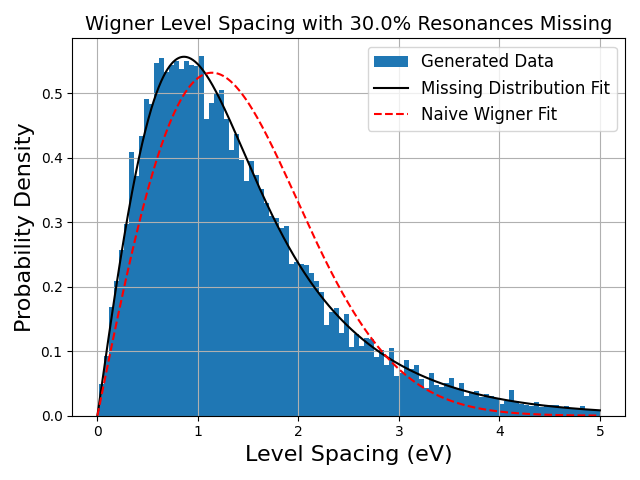

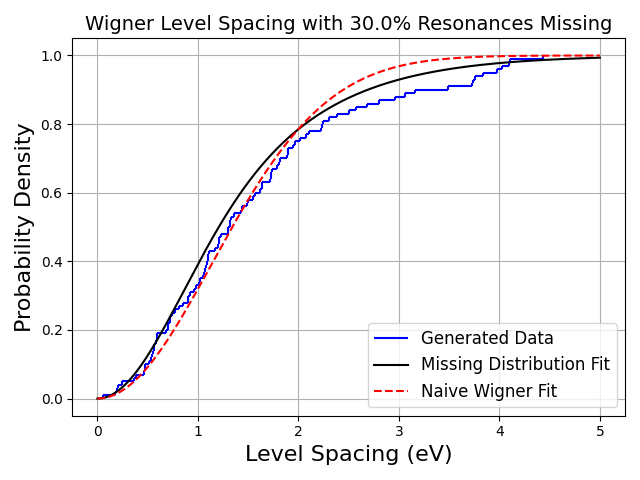

In [10]:
xMax = 5.0

A  = 181
EB = (1e-5,2e4)
pM = [0.3]
Freq  = [1.0]
Gnm   = [1.0]
Ggm   = [1.0]
dfn   = [1]
dfg   = [250]
l     = [0,]
j     = [3.0]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, MissFrac=pM)
Res, Types, Missed_Res, Missed_Types = MP.sample('GOE')

level_spacings_missing = np.diff(Res.E)
level_spacings_missing = level_spacings_missing[level_spacings_missing <= xMax]


L_fit = 1000
N_fit = len(Freq)
Prior = np.ones((L_fit, N_fit))#*np.array(Freq).reshape(1,-1)/(np.sum(Freq))
X_missing = np.linspace(0.0, xMax, L_fit)
PDF_missing = MP.fit('level spacing', 0)(X_missing)
CDF_missing = MP.fit('level spacing', 0, cdf=True)(X_missing)

MP2 = copy(MP)
MP2.Freq = MP.Freq*(1-MP.MissFrac)
MP2.MissFrac = 0.0
PDF_wigner = MP2.fit('level spacing', 0)(X_missing)
CDF_wigner = MP2.fit('level spacing', 0, cdf=True)(X_missing)


# PDF:
plt.figure(6)
plt.clf()
plt.hist(level_spacings_missing, 100, density=True, label='Generated Data')
plt.plot(X_missing, PDF_missing, '-k', label='Missing Distribution Fit')
plt.plot(X_missing, PDF_wigner, '--r', label='Naive Wigner Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title(f'Wigner Level Spacing with {pM[0]:.1%} Resonances Missing', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# CDF:
level_spacings_missing_less = level_spacings_missing[:100]
plt.figure(7)
plt.clf()
Results.ecdf(level_spacings_missing_less, color='b', label='Generated Data')
plt.plot(X_missing, CDF_missing, '-k', label='Missing Distribution Fit')
plt.plot(X_missing, CDF_wigner, '--r', label='Naive Wigner Fit')
plt.grid()
plt.xlabel('Level Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title(f'Wigner Level Spacing with {pM[0]:.1%} Resonances Missing', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Level Spacing Ratio PDF

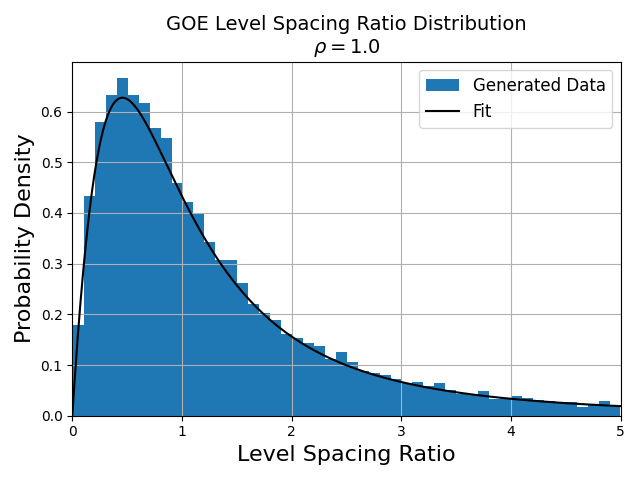

In [11]:
res_energies = RMatrix.SampleEnergies(EB, Freq=1.0, ensemble='GOE')
level_spacings = np.diff(res_energies)
level_spacings = level_spacings[level_spacings <= xMax]
level_spacing_ratios = level_spacings[1:]/level_spacings[:-1]
level_spacing_ratios = level_spacing_ratios[level_spacing_ratios <= xMax]


L_fit = 1000
X = np.linspace(0.0, xMax, L_fit)
P = RMatrix.levelSpacingRatioPDF(X, beta=1)


plt.figure(8)
plt.clf()
plt.hist(level_spacing_ratios, 50, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Fit')
plt.xlim(0, xMax)
plt.grid()
plt.xlabel('Level Spacing Ratio', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('GOE Level Spacing Ratio Distribution\n'+rf'$\rho = {Freq[0]}$', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Higher-Order Level-Spacing Distributions
The nth-order level-spacing is the distance between n-th removed nearest resonances. Higher-order level-spacing distribution equations come from the following journal article:

Source: https://journals.aps.org/pre/pdf/10.1103/PhysRevE.60.5371

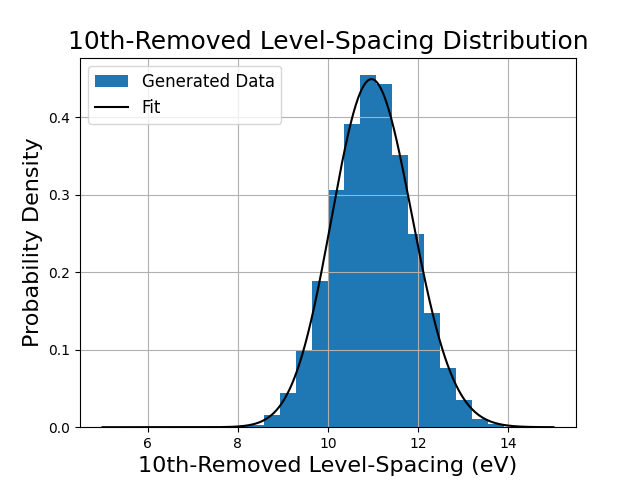

In [12]:
n = 10


nth_level_spacings = res_energies[(n+1):] - res_energies[:-(n+1)]

X = np.linspace(n-5, n+5, 1000)
P = RMatrix.high_order_level_spacing(X, n)


plt.figure(9)
plt.clf()
plt.hist(nth_level_spacings, bins=20, density=True, label='Generated Data')
plt.plot(X, P, '-k', label='Fit')
plt.grid()
plt.title(f'{n}th-Removed Level-Spacing Distribution', fontsize=18)
plt.xlabel(f'{n}th-Removed Level-Spacing (eV)', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Width Distributions

## Neutron Width Distribution

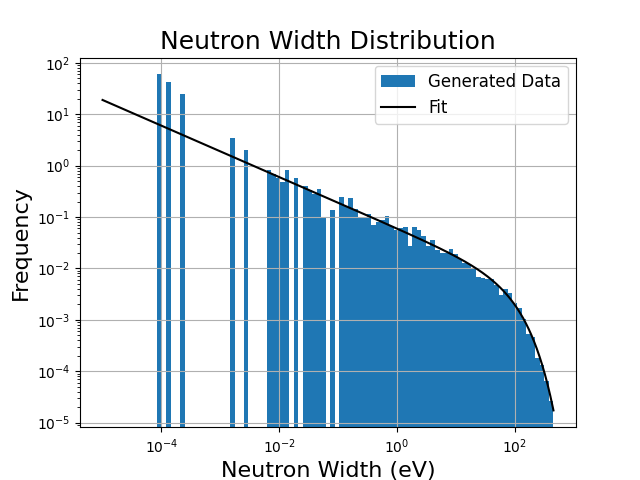

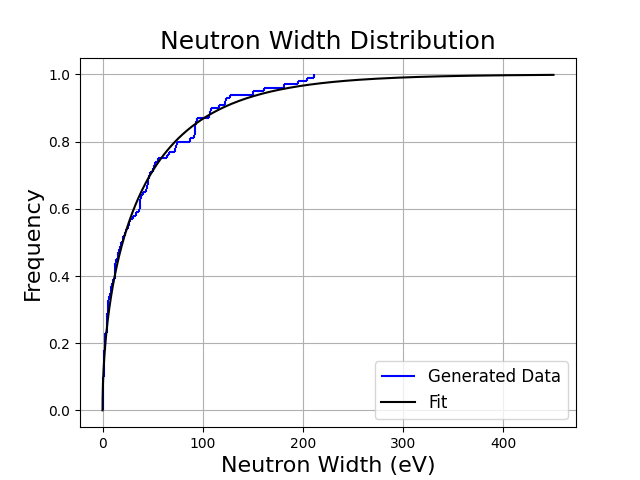

In [13]:
xMin = 1e-5

A  = 181
EB = (1e-5,1e3)
Freq  = [1.0]
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

Gn = copy(Res.Gn)
ac = RMatrix.NuclearRadius(A)
rGn = Gn * RMatrix.ReduceFactor(Res.E, l[0], A, ac)

G = np.exp(np.linspace(np.log(xMin), np.log(np.max(rGn)), 1000))
PDF = MP.fit('neutron width', 0)(G)

G = np.exp(np.linspace(np.log(xMin), np.log(np.max(rGn)), 1000))
CDF = MP.fit('neutron width', 0, cdf=True)(G)


# PDF:
bins = np.exp( np.linspace(np.log(xMin), np.log(np.max(rGn)), 100) )
plt.figure(10)
plt.clf()
plt.hist(rGn, bins=bins, density=True, label='Generated Data')
plt.plot(G, PDF, '-k', label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()


# CDF:
rGn_less = rGn[:100]
plt.figure(11)
plt.clf()
Results.ecdf(rGn_less, color='b', label='Generated Data')
plt.plot(G, CDF, '-k', label='Fit')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()

### With Truncation


0.03170279033509441
0.10413298476041193


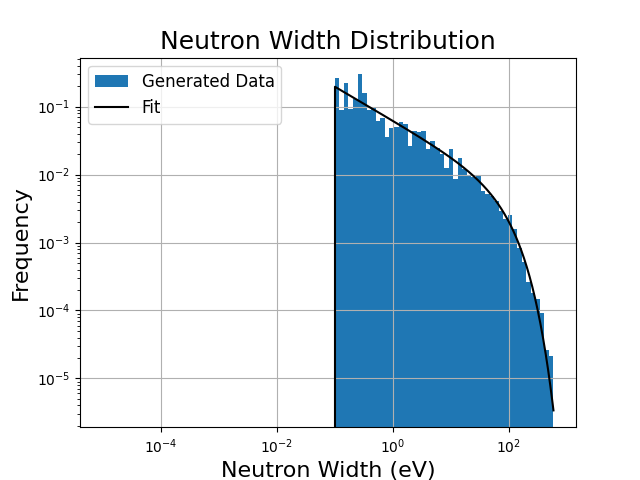

In [14]:
xMin = 1e-5

A  = 181
EB = (1e-5,1e3)
Freq  = [1.0]
Gnm   = [44.11355]
Ggm   = [55.00000]
dfn   = [1]
dfg   = [250]
l     = [0]
j     = [3.0]
trunc = [0.1]


SGs = SpinGroups.make(l, j)
MP = Resonances.MeanParameters(Freq=Freq, Gnm=Gnm, nDOF=dfn, Ggm=Ggm, gDOF=dfg, A=A, sg=SGs, EB=EB, Gn_trunc=trunc)
Res, Types, Missed_Res, Missed_Types = MP.sample('NNE')

rGn = Res.Gn * RMatrix.ReduceFactor(Res.E, MP.L[0,0], MP.A, MP.ac)
rGn.sort()

print()
print(np.min(Res.Gn))
print(rGn[0])

G = np.exp(np.linspace(np.log(xMin), np.log(rGn[-1]), 1000))
P = MP.fit('neutron width', 0)(G)

bins = np.exp( np.linspace(np.log(xMin), np.log(rGn[-1]), 100) )
plt.figure(12)
plt.clf()
plt.hist(rGn, bins=bins, density=True, label='Generated Data')
plt.plot(G, P, '-k', label='Fit')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title('Neutron Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()

## Gamma (Capture) Widths

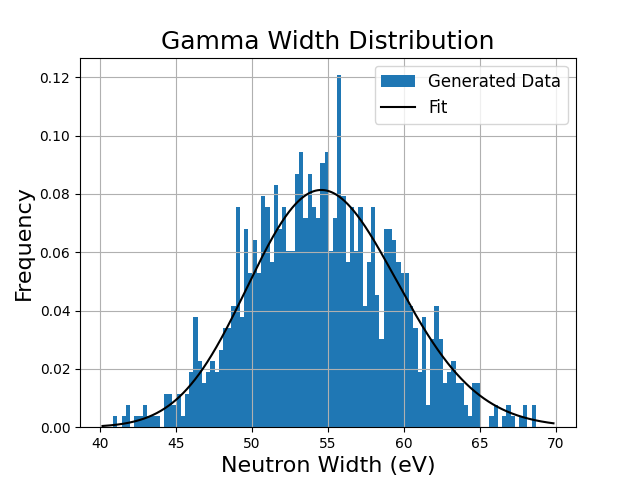

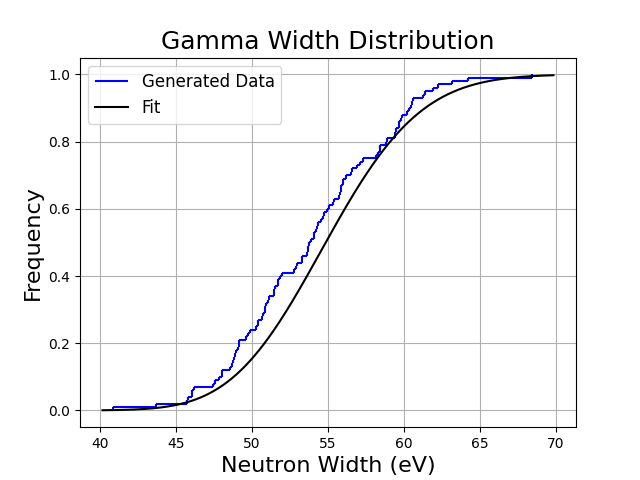

In [15]:
xMin = Ggm[0] - 2*np.sqrt(Ggm[0])
xMax = Ggm[0] + 2*np.sqrt(Ggm[0])


G = np.linspace(xMin, xMax, 1000)
PDF = MP.fit('gamma width', 0)(G)
CDF = MP.fit('gamma width', 0, cdf=True)(G)

Gg = Res.Gg
Gg = Gg[Gg <= xMax]
Gg = Gg[Gg >= xMin]


plt.figure(13)
plt.clf()
plt.hist(Gg, bins=100, density=True, label='Generated Data')
plt.plot(G, PDF, '-k', label='Fit')
plt.grid()
plt.title('Gamma Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()

Gg_less = Gg[:100]
plt.figure(14)
plt.clf()
Results.ecdf(Gg_less, color='b', label='Generated Data')
# plt.hist(rGn, bins=bins, density=True, log=True, label='Generated Data')
plt.plot(G, CDF, '-k', label='Fit')
plt.grid()
plt.title('Gamma Width Distribution', fontsize=18)
plt.xlabel('Neutron Width (eV)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.legend(fontsize=12)
plt.show()